# Tensorflow tutorial

In this seminar, we're going to play with [Tensorflow](https://www.tensorflow.org/) and see how it helps us build deep learning models.

If you're running this notebook outside course environment, you'll need to install tensorflow:
* `pip install tensorflow` should install cpu-only TF on Linux & Mac OS
* If you want GPU support from offset, see [TF install page](https://www.tensorflow.org/install/)

# Warming up
For starters, let's implement a python function that computes the sum of squares of numbers from 0 to N-1.
* Use numpy or python
* An array of numbers 0 to N - numpy.arange(N)

In [1]:
import numpy as np
def sum_squares(N):
    return np.sum(np.arange(N) ** 2)#<student.Implement_me()>

In [2]:
%%time
sum_squares(10 ** 8)

CPU times: user 164 ms, sys: 104 ms, total: 269 ms
Wall time: 268 ms


662921401752298880

# Tensoflow teaser

Doing the very same thing

In [3]:
import tensorflow as tf
s = tf.InteractiveSession()

#I gonna be your function parameter
N = tf.placeholder('int64', name="input_to_your_function")

#i am a recipe on how to produce sum of squares of arange of N given N
result = tf.reduce_sum((tf.range(N) ** 2))

In [4]:
%%time
#example of computing the same as sum_squares
print(result.eval({N: 10 ** 8}))

662921401752298880
CPU times: user 458 ms, sys: 274 ms, total: 731 ms
Wall time: 587 ms


In [5]:
%%time
s.run([result, result + 1], {N: 10 ** 8})

CPU times: user 414 ms, sys: 2.71 ms, total: 416 ms
Wall time: 265 ms


[662921401752298880, 662921401752298881]

In [6]:
%%time
result.eval({N: 10 ** 8})
(result + 1).eval({N: 10 ** 8})

CPU times: user 664 ms, sys: 28.2 ms, total: 692 ms
Wall time: 489 ms


Look at the last two times. Why do you think they're so different?

# How does it work?
1. define placeholders where you'll send inputs;
2. make symbolic graph: a recipe for mathematical transformation of those placeholders;
3. compute outputs of your graph with particular values for each placeholder
  * output.eval({placeholder:value}) 
  * s.run(output, {placeholder:value})

* So far there are two main entities: "placeholder" and "transformation"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be int32/64, floats of booleans (uint8) of various size.

* You can define new transformations as an arbitrary operation on placeholders and other transformations
 * tf.reduce_sum(tf.arange(N)\**2) are 3 sequential transformations of placeholder N
 * There's a tensorflow symbolic version for every numpy function
   * `a+b, a/b, a**b, ...` behave just like in numpy
   * np.mean -> tf.reduce_mean
   * np.arange -> tf.range
   * np.cumsum -> tf.cumsum
   * If if you can't find the op you need, see the docs [docs](https://www.tensorflow.org/api_docs/python).
 
 
Still confused? We gonna fix that.

In [7]:
#Default placeholder that can be arbitrary float32 scalar, vertor, matrix, etc.
arbitrary_input = tf.placeholder('float32')

#Input vector of arbitrary length
input_vector = tf.placeholder('float32', shape=(None,))

#Input vector that _must_ have 10 elements and integer type
fixed_vector = tf.placeholder('int32', shape=(10,))

#Matrix of arbitrary n_rows and 15 columns (e.g. a minibatch your data table)
input_matrix = tf.placeholder('float32', shape=(None, 15))

#You can generally use None whenever you don't need a specific shape
input1 = tf.placeholder('float64', shape=(None, 100, None))
input2 = tf.placeholder('int32', shape=(None, None, 3, 224, 224))

In [8]:
#elementwise multiplication
double_the_vector = input_vector * 2

#elementwise cosine
elementwise_cosine = tf.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector ** 2 - input_vector

In [9]:
#Practice time:
#create two vectors of type float32
my_vector = tf.placeholder('float32', shape=(None,))
my_vector2 = tf.placeholder('float32', shape=(None,))

In [10]:
#Write a transformation(recipe):
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = my_vector * my_vector2 /  (tf.sin(my_vector) + 1)

In [11]:
print(my_transformation)
#it's okay, it's a symbolic graph

Tensor("truediv:0", shape=(?,), dtype=float32)


In [12]:
dummy = np.arange(5).astype('float32')
my_transformation.eval({my_vector: dummy, my_vector2: dummy[::-1]})

array([ 0.        ,  1.62913239,  2.09501147,  2.62899613,  0.        ], dtype=float32)

### Visualizing graphs

It's often useful to visualize the computation graph when debugging or optimizing. 
Interactive visualization is where tensorflow really shines as compared to other frameworks. 

There's a special instrument for that, called Tensorboard. You can launch it from console:

```tensorboard --logdir=/tmp/tboard --port=7007```

If you're pathologically afraid of consoles, try this:

```os.system("tensorboard --logdir=/tmp/tboard --port=7007 &"```

_(but don't tell anyone we taught you that)_

In [13]:
#launch tensorflow the ugly way, uncomment if you need that
#import os
#!killall tensorboard
#os.system("tensorboard --logdir=/tmp/tboard --port=7007 &")

#show graph to tensorboard
writer = tf.summary.FileWriter("/tmp/tboard", graph=tf.get_default_graph())
writer.close()

One basic functionality of tensorboard is drawing graphs. One you've run the cell above, go to `localhost:7007` in your browser and switch to _graphs_ tab in the topbar. 

Here's what you should see:

<img src="https://s12.postimg.org/a374bmffx/tensorboard.png" width=480>

Tensorboard also allows you to draw graphs (e.g. learning curves), record images & audio ~~and play flash games~~. This is useful when monitoring learning progress and catching some training issues.

One researcher said:
```
If you spent last four hours of your worktime watching as your algorithm prints numbers and draws figures, you're probably doing deep learning wrong.
```

You can read more on tensorboard usage [here](https://www.tensorflow.org/get_started/graph_viz)

# Do It Yourself

__[2 points max]__

In [14]:
# Quest #1 - implement a function that computes a mean squared error of two input vectors
# Your function has to take 2 vectors and return a single number

vector_1 = tf.placeholder('float32', shape=(None,))
vector_2 = tf.placeholder('float32', shape=(None,))

mse = tf.reduce_mean((vector_1 - vector_2) ** 2)

compute_mse = lambda vector1, vector2: mse.eval({vector_1: vector1, vector_2: vector2})

In [15]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10**3]:
    
    elems = [np.arange(n), np.arange(n,0,-1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Wrong result:')
                print('mse(%s,%s)'%(el, el_2))
                print("should be: %f, but your function returned %f"%(true_mse, my_mse))
                raise(ValueError, "Что-то не так")

print("All tests passed")

All tests passed


# variables

The inputs and transformations have no value outside function call. This isn't too comfortable if you want your model to have parameters (e.g. network weights) that are always present, but can change their value over time.

Tensorflow solves this with `tf.Variable` objects.
* You can assign variable a value at any time in your graph
* Unlike placeholders, there's no need to explicitly pass values to variables when `s.run(...)`-ing
* You can use variables the same way you use transformations 
 

In [16]:
#creating shared variable
shared_vector_1 = tf.Variable(initial_value=np.ones(5))

In [17]:
#initialize variable(s) with initial values
s.run(tf.global_variables_initializer())

#evaluating shared variable (outside symbolicd graph)
print ("initial value", s.run(shared_vector_1))

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.]


In [18]:
#setting new value
s.run(shared_vector_1.assign(np.arange(5)))

#getting that new value
print ("new value", s.run(shared_vector_1))

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


# tf.gradients - why graphs matter
* Tensorflow can compute derivatives and gradients automatically using the computation graph
* Gradients are computed as a product of elementary derivatives via chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

It can get you the derivative of any graph as long as it knows how to differentiate elementary operations

In [19]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar ** 2

#a derivative of scalar_squared by my_scalar
derivative = tf.gradients(scalar_squared, my_scalar)[0]

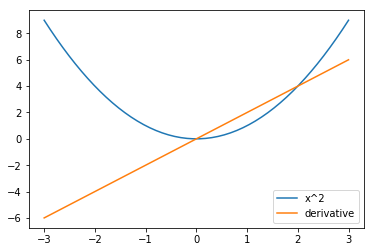

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3)
x_squared, x_squared_der = s.run(
    [scalar_squared, derivative],
    {my_scalar: x}
)

plt.plot(x, x_squared, label="x^2")
plt.plot(x, x_squared_der, label="derivative")
plt.legend()

# Why that rocks

In [21]:
my_vector = tf.placeholder('float32', shape=(None,))

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = tf.reduce_mean((my_vector + my_scalar) ** (1 + tf.nn.moments(my_vector, [0])[1]) + 1. / tf.atan(my_scalar)) / (my_scalar ** 2 + 1) + 0.01 * tf.sin(2 * my_scalar ** 1.5) * (tf.reduce_sum(my_vector) * my_scalar ** 2) * tf.exp((my_scalar-4)**2)/(1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2))/(1+tf.exp(-(my_scalar-4)**2)))**2


der_by_scalar, der_by_vector = tf.gradients(weird_psychotic_function, [my_scalar, my_vector])#<student.compute_grad_over_scalar_and_vector()>

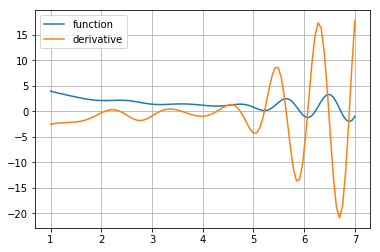

In [22]:
#Plotting your derivative
scalar_space = np.linspace(1, 7, 100)

y = [
    s.run(weird_psychotic_function, {my_scalar: x, my_vector: [1, 2, 3]})
    for x in scalar_space
]

plt.plot(scalar_space, y, label='function')

y_der_by_scalar = [
    s.run(der_by_scalar, {my_scalar: x, my_vector: [1, 2, 3]})
    for x in scalar_space
]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid(); plt.legend()

# Almost done - optimizers

While you can perform gradient descent by hand with automatic grads from above, tensorflow also has some optimization methods implemented for you. Recall momentum & rmsprop?

In [23]:
y_guess = tf.Variable(np.zeros(2, dtype='float32'))
y_true = tf.range(1, 3, dtype='float32')

loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2])) ** 2) 

optimizer = tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss, var_list=[y_guess])

#same, but more detailed:
#opt = tf.train.MomentumOptimizer(0.01,0.9)
#updates = opt.compute_gradients(loss, [y_guess])
#optimizer = opt.apply_gradients(updates)

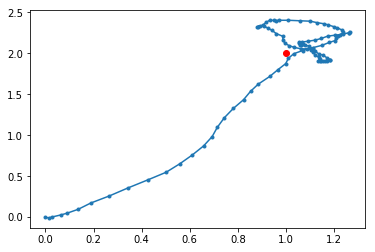

In [24]:
from IPython.display import clear_output

s.run(tf.global_variables_initializer())

guesses = [s.run(y_guess)]

for _ in range(100):
    s.run(optimizer)
    guesses.append(s.run(y_guess))

    clear_output(True)
    plt.plot(*zip(*guesses), marker='.')
    plt.scatter(*s.run(y_true), c='red')
    plt.show()

# Logistic regression example
__[ 4 points max]__

Implement the regular logistic regression training algorithm

Tips:
* Weights and biases fit in as a shared variable
* X and y are potential inputs
* Define loss function and optimizer
* Train regression

In [25]:
from sklearn.datasets import load_digits
mnist = load_digits()

X, y = mnist.data, mnist.target

num_features = X.shape[1]
num_classes = 10

print("y [shape - %s]:"%(str(y.shape)))

print("X [shape - %s]:"%(str(X.shape)))
print(X[:1])
print(y[:10])

y [shape - (1797,)]:
X [shape - (1797, 64)]:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]
[0 1 2 3 4 5 6 7 8 9]


In [26]:
# make target in one-hot format

y = tf.one_hot(y, 10).eval()
print(y.shape)

(1797, 10)


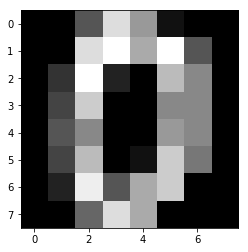

In [27]:
# %% we can visualize any one of the images by reshaping it to a 8x8 image
plt.imshow(np.reshape(mnist.data[0, :], (8, 8)), cmap='gray')

In [28]:
# inputs and shareds
weights = tf.get_variable("weights", shape=(num_features, num_classes), initializer=tf.glorot_uniform_initializer())
bias = tf.get_variable("bias", shape=(num_classes,), initializer=tf.glorot_uniform_initializer())
input_X = tf.placeholder('float32', shape=(None, num_features))
input_y = tf.placeholder('float32', shape=(None, num_classes))

In [29]:
predicted_y = tf.nn.softmax(tf.matmul(input_X, weights) + bias)
loss = -tf.reduce_mean(input_y * tf.log(predicted_y))

optimizer = tf.train.AdamOptimizer().minimize(loss, var_list=[weights, bias])

In [30]:
# accuracy is done for you
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predicted_y, 1),
                                           tf.argmax(input_y, 1)), "float"))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

loss at iter 0:2.0005
train auc: 0.0801782
test auc: 0.0666667
loss at iter 1:1.9551
train auc: 0.0794358
test auc: 0.0688889
loss at iter 2:1.9107
train auc: 0.0794358
test auc: 0.0666667
loss at iter 3:1.8673
train auc: 0.0809206
test auc: 0.0688889
loss at iter 4:1.8251
train auc: 0.0831477
test auc: 0.0666667
loss at iter 5:1.7842
train auc: 0.081663
test auc: 0.0733333
loss at iter 6:1.7446
train auc: 0.0838901
test auc: 0.0733333
loss at iter 7:1.7063
train auc: 0.0831477
test auc: 0.0755556
loss at iter 8:1.6693
train auc: 0.0868597
test auc: 0.0755556
loss at iter 9:1.6337
train auc: 0.0935412
test auc: 0.0777778
loss at iter 10:1.5994
train auc: 0.0987379
test auc: 0.08
loss at iter 11:1.5662
train auc: 0.0972532
test auc: 0.0822222
loss at iter 12:1.5341
train auc: 0.100223
test auc: 0.0844444
loss at iter 13:1.5031
train auc: 0.100965
test auc: 0.0888889
loss at iter 14:1.4728
train auc: 0.10245
test auc: 0.0955556
loss at iter 15:1.4433
train auc: 0.104677
test auc: 0.10666

loss at iter 156:0.1680
train auc: 0.60876
test auc: 0.584444
loss at iter 157:0.1663
train auc: 0.613215
test auc: 0.584444
loss at iter 158:0.1646
train auc: 0.618411
test auc: 0.586667
loss at iter 159:0.1630
train auc: 0.619154
test auc: 0.586667
loss at iter 160:0.1613
train auc: 0.621381
test auc: 0.586667
loss at iter 161:0.1597
train auc: 0.625835
test auc: 0.593333
loss at iter 162:0.1582
train auc: 0.628062
test auc: 0.6
loss at iter 163:0.1566
train auc: 0.63029
test auc: 0.608889
loss at iter 164:0.1551
train auc: 0.63029
test auc: 0.613333
loss at iter 165:0.1536
train auc: 0.634744
test auc: 0.615556
loss at iter 166:0.1521
train auc: 0.638456
test auc: 0.615556
loss at iter 167:0.1507
train auc: 0.642168
test auc: 0.615556
loss at iter 168:0.1492
train auc: 0.645137
test auc: 0.617778
loss at iter 169:0.1478
train auc: 0.64588
test auc: 0.624444
loss at iter 170:0.1464
train auc: 0.651076
test auc: 0.626667
loss at iter 171:0.1451
train auc: 0.653304
test auc: 0.626667
l

train auc: 0.836674
test auc: 0.802222
loss at iter 314:0.0615
train auc: 0.837416
test auc: 0.802222
loss at iter 315:0.0612
train auc: 0.837416
test auc: 0.804444
loss at iter 316:0.0609
train auc: 0.838159
test auc: 0.804444
loss at iter 317:0.0607
train auc: 0.838901
test auc: 0.808889
loss at iter 318:0.0604
train auc: 0.838901
test auc: 0.808889
loss at iter 319:0.0602
train auc: 0.838901
test auc: 0.808889
loss at iter 320:0.0599
train auc: 0.838901
test auc: 0.811111
loss at iter 321:0.0596
train auc: 0.838159
test auc: 0.811111
loss at iter 322:0.0594
train auc: 0.838901
test auc: 0.811111
loss at iter 323:0.0591
train auc: 0.839644
test auc: 0.813333
loss at iter 324:0.0589
train auc: 0.841128
test auc: 0.813333
loss at iter 325:0.0586
train auc: 0.841128
test auc: 0.811111
loss at iter 326:0.0584
train auc: 0.841871
test auc: 0.811111
loss at iter 327:0.0581
train auc: 0.843356
test auc: 0.811111
loss at iter 328:0.0579
train auc: 0.843356
test auc: 0.813333
loss at iter 329

train auc: 0.891611
test auc: 0.868889
loss at iter 461:0.0346
train auc: 0.891611
test auc: 0.868889
loss at iter 462:0.0345
train auc: 0.891611
test auc: 0.868889
loss at iter 463:0.0344
train auc: 0.891611
test auc: 0.868889
loss at iter 464:0.0342
train auc: 0.891611
test auc: 0.868889
loss at iter 465:0.0341
train auc: 0.891611
test auc: 0.868889
loss at iter 466:0.0340
train auc: 0.891611
test auc: 0.868889
loss at iter 467:0.0339
train auc: 0.891611
test auc: 0.868889
loss at iter 468:0.0338
train auc: 0.891611
test auc: 0.868889
loss at iter 469:0.0336
train auc: 0.892353
test auc: 0.868889
loss at iter 470:0.0335
train auc: 0.892353
test auc: 0.868889
loss at iter 471:0.0334
train auc: 0.892353
test auc: 0.868889
loss at iter 472:0.0333
train auc: 0.892353
test auc: 0.868889
loss at iter 473:0.0332
train auc: 0.892353
test auc: 0.868889
loss at iter 474:0.0331
train auc: 0.892353
test auc: 0.868889
loss at iter 475:0.0330
train auc: 0.893096
test auc: 0.868889
loss at iter 476

train auc: 0.9317
test auc: 0.88
loss at iter 604:0.0223
train auc: 0.932442
test auc: 0.88
loss at iter 605:0.0222
train auc: 0.932442
test auc: 0.88
loss at iter 606:0.0222
train auc: 0.932442
test auc: 0.88
loss at iter 607:0.0221
train auc: 0.933185
test auc: 0.88
loss at iter 608:0.0220
train auc: 0.933185
test auc: 0.88
loss at iter 609:0.0220
train auc: 0.933185
test auc: 0.88
loss at iter 610:0.0219
train auc: 0.933185
test auc: 0.88
loss at iter 611:0.0219
train auc: 0.933185
test auc: 0.88
loss at iter 612:0.0218
train auc: 0.933185
test auc: 0.88
loss at iter 613:0.0218
train auc: 0.933185
test auc: 0.88
loss at iter 614:0.0217
train auc: 0.933185
test auc: 0.88
loss at iter 615:0.0216
train auc: 0.933185
test auc: 0.88
loss at iter 616:0.0216
train auc: 0.933185
test auc: 0.88
loss at iter 617:0.0215
train auc: 0.933185
test auc: 0.88
loss at iter 618:0.0215
train auc: 0.933185
test auc: 0.88
loss at iter 619:0.0214
train auc: 0.933185
test auc: 0.88
loss at iter 620:0.0214

loss at iter 750:0.0159
train auc: 0.955457
test auc: 0.893333
loss at iter 751:0.0159
train auc: 0.955457
test auc: 0.893333
loss at iter 752:0.0158
train auc: 0.956199
test auc: 0.893333
loss at iter 753:0.0158
train auc: 0.957684
test auc: 0.893333
loss at iter 754:0.0158
train auc: 0.957684
test auc: 0.893333
loss at iter 755:0.0157
train auc: 0.957684
test auc: 0.893333
loss at iter 756:0.0157
train auc: 0.957684
test auc: 0.893333
loss at iter 757:0.0157
train auc: 0.957684
test auc: 0.893333
loss at iter 758:0.0156
train auc: 0.957684
test auc: 0.893333
loss at iter 759:0.0156
train auc: 0.957684
test auc: 0.893333
loss at iter 760:0.0156
train auc: 0.957684
test auc: 0.893333
loss at iter 761:0.0156
train auc: 0.958426
test auc: 0.893333
loss at iter 762:0.0155
train auc: 0.958426
test auc: 0.893333
loss at iter 763:0.0155
train auc: 0.958426
test auc: 0.893333
loss at iter 764:0.0155
train auc: 0.958426
test auc: 0.893333
loss at iter 765:0.0154
train auc: 0.958426
test auc: 0

loss at iter 884:0.0125
train auc: 0.96882
test auc: 0.9
loss at iter 885:0.0125
train auc: 0.96882
test auc: 0.9
loss at iter 886:0.0125
train auc: 0.96882
test auc: 0.9
loss at iter 887:0.0124
train auc: 0.96882
test auc: 0.9
loss at iter 888:0.0124
train auc: 0.96882
test auc: 0.9
loss at iter 889:0.0124
train auc: 0.969562
test auc: 0.9
loss at iter 890:0.0124
train auc: 0.969562
test auc: 0.9
loss at iter 891:0.0124
train auc: 0.969562
test auc: 0.9
loss at iter 892:0.0123
train auc: 0.969562
test auc: 0.9
loss at iter 893:0.0123
train auc: 0.969562
test auc: 0.9
loss at iter 894:0.0123
train auc: 0.969562
test auc: 0.9
loss at iter 895:0.0123
train auc: 0.969562
test auc: 0.9
loss at iter 896:0.0123
train auc: 0.969562
test auc: 0.9
loss at iter 897:0.0122
train auc: 0.969562
test auc: 0.902222
loss at iter 898:0.0122
train auc: 0.970304
test auc: 0.902222
loss at iter 899:0.0122
train auc: 0.970304
test auc: 0.902222
loss at iter 900:0.0122
train auc: 0.970304
test auc: 0.902222

loss at iter 1021:0.0102
train auc: 0.973274
test auc: 0.911111
loss at iter 1022:0.0102
train auc: 0.973274
test auc: 0.911111
loss at iter 1023:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1024:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1025:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1026:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1027:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1028:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1029:0.0101
train auc: 0.973274
test auc: 0.911111
loss at iter 1030:0.0100
train auc: 0.973274
test auc: 0.911111
loss at iter 1031:0.0100
train auc: 0.973274
test auc: 0.911111
loss at iter 1032:0.0100
train auc: 0.973274
test auc: 0.911111
loss at iter 1033:0.0100
train auc: 0.973274
test auc: 0.911111
loss at iter 1034:0.0100
train auc: 0.974016
test auc: 0.913333
loss at iter 1035:0.0100
train auc: 0.974016
test auc: 0.913333
loss at iter 1036:0.0100
train auc: 0.97

test auc: 0.917778
loss at iter 1162:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1163:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1164:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1165:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1166:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1167:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1168:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1169:0.0084
train auc: 0.979955
test auc: 0.917778
loss at iter 1170:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1171:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1172:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1173:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1174:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1175:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1176:0.0083
train auc: 0.979955
test auc: 0.917778
loss at iter 1177:0.0

loss at iter 1303:0.0071
train auc: 0.983667
test auc: 0.922222
loss at iter 1304:0.0071
train auc: 0.983667
test auc: 0.922222
loss at iter 1305:0.0071
train auc: 0.983667
test auc: 0.922222
loss at iter 1306:0.0071
train auc: 0.983667
test auc: 0.922222
loss at iter 1307:0.0071
train auc: 0.983667
test auc: 0.922222
loss at iter 1308:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1309:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1310:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1311:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1312:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1313:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1314:0.0070
train auc: 0.983667
test auc: 0.922222
loss at iter 1315:0.0070
train auc: 0.983667
test auc: 0.924444
loss at iter 1316:0.0070
train auc: 0.983667
test auc: 0.924444
loss at iter 1317:0.0070
train auc: 0.983667
test auc: 0.924444
loss at iter 1318:0.0070
train auc: 0.98

train auc: 0.985152
test auc: 0.928889
loss at iter 1439:0.0061
train auc: 0.985152
test auc: 0.928889
loss at iter 1440:0.0061
train auc: 0.985152
test auc: 0.928889
loss at iter 1441:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1442:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1443:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1444:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1445:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1446:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1447:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1448:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1449:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1450:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1451:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1452:0.0060
train auc: 0.985152
test auc: 0.928889
loss at iter 1453:0.0060
train auc: 0.985895
test auc: 0.928889
l

loss at iter 1591:0.0052
train auc: 0.990349
test auc: 0.935556
loss at iter 1592:0.0052
train auc: 0.990349
test auc: 0.935556
loss at iter 1593:0.0051
train auc: 0.990349
test auc: 0.935556
loss at iter 1594:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1595:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1596:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1597:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1598:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1599:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1600:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1601:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1602:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1603:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1604:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1605:0.0051
train auc: 0.990349
test auc: 0.937778
loss at iter 1606:0.0051
train auc: 0.99

train auc: 0.992576
test auc: 0.94
loss at iter 1754:0.0044
train auc: 0.992576
test auc: 0.94
loss at iter 1755:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1756:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1757:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1758:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1759:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1760:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1761:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1762:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1763:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1764:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1765:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1766:0.0044
train auc: 0.993318
test auc: 0.94
loss at iter 1767:0.0043
train auc: 0.993318
test auc: 0.94
loss at iter 1768:0.0043
train auc: 0.993318
test auc: 0.94
loss at iter 1769:0.0043
train auc: 0.993318
test auc: 0.94
loss 

test auc: 0.94
loss at iter 1915:0.0038
train auc: 0.995546
test auc: 0.94
loss at iter 1916:0.0038
train auc: 0.995546
test auc: 0.94
loss at iter 1917:0.0038
train auc: 0.995546
test auc: 0.94
loss at iter 1918:0.0038
train auc: 0.995546
test auc: 0.94
loss at iter 1919:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1920:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1921:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1922:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1923:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1924:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1925:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1926:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1927:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1928:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1929:0.0038
train auc: 0.995546
test auc: 0.942222
loss at iter 1930:0.0038
train auc: 0.995

loss at iter 2071:0.0034
train auc: 0.995546
test auc: 0.944444
loss at iter 2072:0.0034
train auc: 0.995546
test auc: 0.944444
loss at iter 2073:0.0034
train auc: 0.995546
test auc: 0.944444
loss at iter 2074:0.0034
train auc: 0.995546
test auc: 0.944444
loss at iter 2075:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2076:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2077:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2078:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2079:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2080:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2081:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2082:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2083:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2084:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2085:0.0033
train auc: 0.995546
test auc: 0.944444
loss at iter 2086:0.0033
train auc: 0.99

loss at iter 2229:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2230:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2231:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2232:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2233:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2234:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2235:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2236:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2237:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2238:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2239:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2240:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2241:0.0030
train auc: 0.99703
test auc: 0.946667
loss at iter 2242:0.0029
train auc: 0.99703
test auc: 0.946667
loss at iter 2243:0.0029
train auc: 0.99703
test auc: 0.946667
loss at iter 2244:0.0029
train auc: 0.99703
test auc: 0

loss at iter 2383:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2384:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2385:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2386:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2387:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2388:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2389:0.0027
train auc: 0.998515
test auc: 0.951111
loss at iter 2390:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2391:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2392:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2393:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2394:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2395:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2396:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2397:0.0026
train auc: 0.998515
test auc: 0.951111
loss at iter 2398:0.0026
train auc: 0.99

test auc: 0.951111
loss at iter 2542:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2543:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2544:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2545:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2546:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2547:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2548:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2549:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2550:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2551:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2552:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2553:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2554:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2555:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2556:0.0024
train auc: 0.999258
test auc: 0.951111
loss at iter 2557:0.0

test auc: 0.951111
loss at iter 2700:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2701:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2702:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2703:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2704:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2705:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2706:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2707:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2708:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2709:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2710:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2711:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2712:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2713:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2714:0.0021
train auc: 0.999258
test auc: 0.951111
loss at iter 2715:0.0

test auc: 0.951111
loss at iter 2859:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2860:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2861:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2862:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2863:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2864:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2865:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2866:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2867:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2868:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2869:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2870:0.0019
train auc: 0.999258
test auc: 0.951111
loss at iter 2871:0.0019
train auc: 0.999258
test auc: 0.953333
loss at iter 2872:0.0019
train auc: 0.999258
test auc: 0.953333
loss at iter 2873:0.0019
train auc: 0.999258
test auc: 0.953333
loss at iter 2874:0.0

test auc: 0.953333
loss at iter 3020:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3021:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3022:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3023:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3024:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3025:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3026:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3027:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3028:0.0018
train auc: 0.999258
test auc: 0.953333
loss at iter 3029:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3030:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3031:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3032:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3033:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3034:0.0017
train auc: 0.999258
test auc: 0.953333
loss at iter 3035:0.0

test auc: 0.953333
loss at iter 3178:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3179:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3180:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3181:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3182:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3183:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3184:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3185:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3186:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3187:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3188:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3189:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3190:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3191:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3192:0.0016
train auc: 0.999258
test auc: 0.953333
loss at iter 3193:0.0

test auc: 0.951111
loss at iter 3328:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3329:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3330:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3331:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3332:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3333:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3334:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3335:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3336:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3337:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3338:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3339:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3340:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3341:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3342:0.0015
train auc: 0.999258
test auc: 0.951111
loss at iter 3343:0.0

train auc: 1.0
test auc: 0.951111
loss at iter 3480:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3481:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3482:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3483:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3484:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3485:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3486:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3487:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3488:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3489:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3490:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3491:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3492:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3493:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3494:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3495:0.0013
train auc: 1.0
test auc: 0.951111
loss at iter 3496:0.00

loss at iter 3637:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3638:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3639:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3640:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3641:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3642:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3643:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3644:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3645:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3646:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3647:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3648:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3649:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3650:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3651:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3652:0.0012
train auc: 1.0
test auc: 0.953333
loss at iter 3653:0.0012
train auc: 1.0
test auc: 0.9533

loss at iter 3850:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3851:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3852:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3853:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3854:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3855:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3856:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3857:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3858:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3859:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3860:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3861:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3862:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3863:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3864:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3865:0.0011
train auc: 1.0
test auc: 0.953333
loss at iter 3866:0.0011
train auc: 1.0
test auc: 0.9533

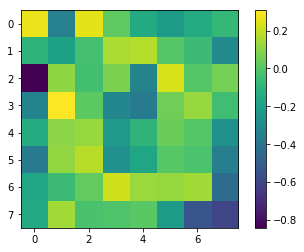

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(4000):
    sess.run(optimizer, {input_X: X_train, input_y: y_train})
    loss_i = sess.run(loss, {input_X: X_train, input_y: y_train})

    print ("loss at iter %i:%.4f"%(i, loss_i))

    print ("train auc:", sess.run(accuracy, feed_dict={input_X: X_train, input_y: y_train}))
    print ("test auc:", sess.run(accuracy, feed_dict={input_X: X_test, input_y: y_test}))

print ("resulting weights:")
plt.imshow(sess.run(weights)[:, 0].reshape(8,-1))
plt.colorbar()

# my1stNN
__[basic part 4 points max]__
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure tensorflow.

This time you will same digit recognition problem, but at a larger scale
* images are now 28x28
* 10 different digits
* 50k samples

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already have ive you an edge over logistic regression.

__[bonus score]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuraсy on test set.

__SPOILER!__
At the end of the notebook you will find a few tips and frequently made mistakes. If you feel enough might to shoot yourself in the foot without external assistance, we encourage you to do so, but if you encounter any unsurpassable issues, please do look there before mailing us.


In [33]:
import tensorflow as tf
import numpy as np
s = tf.InteractiveSession()
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from mnist import load_dataset

#[down]loading the original MNIST dataset.
#Please note that you should only train your NN on _train sample,
# _val can be used to evaluate out-of-sample error, compare models or perform early-stopping
# _test should be hidden under a rock untill final evaluation... But we both know it is near impossible to catch you evaluating on it.
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print(X_train.shape, y_train.shape)

(50000, 1, 28, 28) (50000,)


In [35]:
num_classes = 10
y_train = tf.one_hot(y_train, num_classes).eval()
y_val = tf.one_hot(y_val, num_classes).eval()
y_test = tf.one_hot(y_test, num_classes).eval()

image_shape = (28, 28)
X_train = np.reshape(X_train, (len(X_train),) + image_shape + (1,))
X_val = np.reshape(X_val, (len(X_val),) + image_shape + (1,))
X_test = np.reshape(X_test, (len(X_test),) + image_shape + (1,))

print(X_train.shape, y_train.shape)

(50000, 28, 28, 1) (50000, 10)


In [36]:
input_X = tf.placeholder('float32', shape=(None,) + image_shape + (1,))
input_y = tf.placeholder('float32', shape=(None, num_classes))

# if you want a particular initialization, check docs and find it there
# i.e., for Glorot Uniform you may import the following
# from tf.contrib.keras.initializers import glorot_uniform

# below is just an EXAMPLE! You can change everything

with tf.variable_scope('MyNN'):
    nn = tf.layers.conv2d(
        input_X, 32, 3, activation=tf.nn.relu,
        kernel_initializer=tf.glorot_uniform_initializer(),
        bias_initializer=tf.glorot_uniform_initializer()
    )
    nn = tf.layers.max_pooling2d(nn, 2, 2)
    nn = tf.layers.batch_normalization(nn)
    nn = tf.layers.conv2d(
        nn, 64, 3, activation=tf.nn.relu,
        kernel_initializer=tf.glorot_uniform_initializer(),
        bias_initializer=tf.glorot_uniform_initializer()
    )
    nn = tf.layers.max_pooling2d(nn, 2, 2)
    nn = tf.layers.batch_normalization(nn)
    
    nn = tf.layers.flatten(nn)

    nn = tf.layers.dense(
        nn, 512, activation=tf.nn.relu,
        kernel_initializer=tf.glorot_uniform_initializer(),
        bias_initializer=tf.glorot_uniform_initializer()
    )
    nn = tf.layers.dense(
        nn, 512, activation=tf.nn.relu,
        kernel_initializer=tf.glorot_uniform_initializer(),
        bias_initializer=tf.glorot_uniform_initializer()
    )

    predicted_y = tf.layers.dense(
        nn, num_classes,
        kernel_initializer=tf.glorot_uniform_initializer(),
        bias_initializer=tf.glorot_uniform_initializer()
    )

In [37]:
weights = [
    variable
    for variable in tf.global_variables()
    if variable.name.startswith('MyNN')
]
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted_y, labels=input_y))
learning_rate = tf.Variable(0.001)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss, var_list=(weights,))
accuracy = tf.reduce_mean(tf.cast(tf.equal(
    tf.argmax(predicted_y, 1),
    tf.argmax(input_y, 1)),
    "float"
))

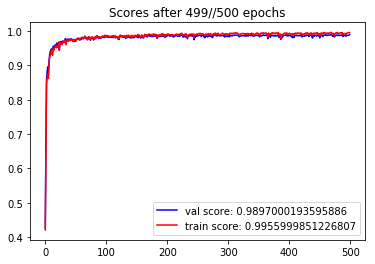

In [38]:
from IPython.display import clear_output

sess_large = tf.Session()
sess_large.run(tf.global_variables_initializer())

def mnist_batch_generator(in_x, in_y, batch_size):
    random_indeces = np.random.permutation(len(in_x))[:batch_size]
    return in_x[random_indeces], in_y[random_indeces]

# We'll train in minibatches and report accuracy:
batch_size = 32
n_epochs = 500

val_scores = []
train_scores = []
for epoch_i in range(n_epochs):
    for batch_i in range(int(n_epochs / batch_size)):        
        batch_xs, batch_ys = mnist_batch_generator(X_train, y_train, batch_size)
        sess_large.run(
            optimizer, feed_dict={
                input_X: batch_xs, input_y: batch_ys
            }
        )

    val_scores.append(sess_large.run(
        accuracy,
        feed_dict={
            input_X: X_val,
            input_y: y_val
        }
    ))
    X_train_batch, y_train_batch = mnist_batch_generator(X_train, y_train, len(X_val))
    train_scores.append(sess_large.run(
        accuracy,
        feed_dict={
            input_X: X_train_batch,
            input_y: y_train_batch
        }
    ))
    clear_output(True)
    plt.plot(val_scores, color='blue', label='val score: {}'.format(val_scores[-1]))
    plt.plot(train_scores, color='red', label='train score: {}'.format(train_scores[-1]))
    plt.title("Scores after {}//{} epochs".format(epoch_i, n_epochs))
    plt.legend()
    plt.show()

    if train_scores[-1] > 0.98:
        learning_rate = 0.0001

In [39]:
print(
    "accuracy at test",
    sess_large.run(
        accuracy,
        feed_dict={
            input_X: X_test,
            input_y: y_test
        }
    )
)

accuracy at test 0.9905


# Report

Сначала сделал 2 полносвязных слоя. Они дали качество в районе 0.95. Потом добавил 2 conv'а и сделал, чтобы рисовались графики ошибки при обучении. Качество выросло до 0.97 с копйками. Затем добавил усреднение по батчу, уменьшение темпа обучания, когда качество уже достаточно большое и исправил немного ошибок (например, по ошибка второй conv состоял, как и первый, из 32 фильтров, а хотелось 64). Качество на тесте 0.99, правда это скорее удачное стечение обстоятельств, в реальности оно варируется от 0.985 до 0.99. Задание полезное, т.к. чисто на tf я раньше не писал.

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from previous assignment to classify some number against others (e.g. zero vs nonzero)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as T.nnet.softmax (stable)
  - probably better to use STOCHASTIC gradient descent (minibatch)
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.
  